In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import os


In [2]:
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras import utils, optimizers
from tensorflow import lite

In [3]:
# Open the Recoleccion1 folder
os.chdir("Recoleccion1")
# Get the list of files in the folder
files = os.listdir()
#len(files)

In [111]:
alldatos =[]
rmsdatos=[]
for x in range(0,len(files)):
    # print(files[x])
    # Open the file for reading
    csv = open(files[x], "r")
    
    # agregar los datos del archivo a la matriz
    #alldatos.append(csv.read().splitlines())
    try:
        new_list = [int(element) for element in csv.read().splitlines()]
    except (ValueError, TypeError):
        for element in csv.read().splitlines():
            try:
                sf = int(element)
            except (ValueError, TypeError):
                sf = 0
            finally:
                new_list.append(sf)
    finally:
        alldatos.append(np.mean(new_list))
    # Close the file
    csv.close()
        
    #intento 1
    #alldatos.append(list(map(int,csv.read().splitlines())))
    #intento 2
    #new_list = [int(element) for element in csv.read().splitlines()]
    #alldatos.append(new_list)

datosinput= np.array(alldatos)

In [112]:
datosinput
datosinput.shape

(601,)

In [113]:
# estraccion de caracteristicas
#len(datosinput[0])

#for x in range(0,len(datosinput[0])):
#    print(datosinput[0][x])

# valores promedio de un array
np.mean(datosinput[0])

1620.0239520958085

In [114]:
allresults = []
#########
# Down                  High 
#0     H                #66.6  L
#16.6  N    #50  B      #83.3  N
#33.3  L                #100   H
#########
for x in range(0,len(files)):
    text = files[x].split("_")[0]
    if text[len(text)-1] == "B":
        allresults.append(0)
    else :
        #print(text[len(text)-2:])
        # switch case
        if text[len(text)-2:] == "UH":
            allresults.append(100)
        elif text[len(text)-2:] == "UN":
            allresults.append(83.3)
        elif text[len(text)-2:] == "UL":
            allresults.append(66.6)
        elif text[len(text)-2:] == "DL":
            allresults.append(33.3)
        elif text[len(text)-2:] == "DN":
            allresults.append(16.6)
        elif text[len(text)-2:] == "DH":
            allresults.append(0)
datosoutput = np.array(allresults)


In [115]:
datosoutput
datosoutput.shape

(601,)

In [116]:
# datos de entrenamiento
x_train, x_test, y_train, y_test = train_test_split(datosinput, datosoutput, test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(480,)
(121,)
(480,)
(121,)


In [117]:
x_train
print("eyes")
y_train

eyes


array([ 66.6,   0. ,  16.6,  33.3,  16.6,   0. , 100. ,  83.3,  33.3,
        16.6,  33.3,  83.3,  83.3,  83.3,   0. ,   0. ,   0. ,  66.6,
         0. ,  33.3,  66.6,  66.6,  66.6,  83.3,  33.3,   0. ,  33.3,
        33.3,  83.3,  33.3,   0. ,  33.3,  33.3, 100. ,   0. ,   0. ,
         0. ,  16.6,   0. ,  33.3,  66.6,  16.6,  66.6,  66.6,  83.3,
         0. ,  16.6,  16.6,  66.6,   0. ,  16.6,   0. ,   0. , 100. ,
        66.6,   0. ,  33.3, 100. ,  83.3,   0. ,  66.6,  66.6,  33.3,
        16.6,  83.3,  66.6,  83.3,  33.3,   0. ,  16.6, 100. ,  33.3,
       100. ,  66.6,   0. ,   0. ,  83.3,  33.3,  16.6,   0. ,  83.3,
        16.6,  83.3,  83.3, 100. ,  83.3,  66.6,   0. ,  33.3,  33.3,
        83.3,  83.3,  66.6,   0. ,  16.6,   0. ,   0. , 100. , 100. ,
         0. , 100. ,  83.3,   0. , 100. ,   0. ,   0. ,   0. ,  66.6,
       100. ,   0. ,  33.3,  16.6,  33.3,  83.3,  16.6, 100. ,  33.3,
        83.3,   0. ,  66.6,  83.3, 100. , 100. , 100. ,  33.3,  33.3,
        33.3,  66.6,

In [127]:
# define the model
inputlayer = tf.keras.layers.Dense(units=1, input_shape=[1], activation='relu')
#oculta2 = tf.keras.layers.Dense(units=500, activation='relu')#datosinput.shape[0]
oculta = tf.keras.layers.Dense(units=7, activation='softmax')
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([inputlayer, oculta, salida])

In [128]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    #loss='mean_squared_error',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [129]:
print("Comenzando entrenamiento...")
historial = modelo.fit(x_train, y_train, epochs=1000,verbose=1 )#
print("Modelo entrenado!")


Comenzando entrenamiento...
Epoch 1/1000
15/15 [==============================] - 0s 2ms/step - loss: 5.3237e-06 - accuracy: 0.2667
Epoch 2/1000
15/15 [==============================] - 0s 2ms/step - loss: 5.3237e-06 - accuracy: 0.2667
Epoch 3/1000
15/15 [==============================] - 0s 2ms/step - loss: 5.3237e-06 - accuracy: 0.2667
Epoch 4/1000
15/15 [==============================] - 0s 2ms/step - loss: 5.3237e-06 - accuracy: 0.2667
Epoch 5/1000
15/15 [==============================] - 0s 2ms/step - loss: 5.3237e-06 - accuracy: 0.2667
Epoch 6/1000
15/15 [==============================] - 0s 2ms/step - loss: 5.3237e-06 - accuracy: 0.2667
Epoch 7/1000
15/15 [==============================] - 0s 2ms/step - loss: 5.3237e-06 - accuracy: 0.2667
Epoch 8/1000
15/15 [==============================] - 0s 1ms/step - loss: 5.3237e-06 - accuracy: 0.2667
Epoch 9/1000
15/15 [==============================] - 0s 2ms/step - loss: 5.3237e-06 - accuracy: 0.2667
Epoch 10/1000
15/15 [===============

In [130]:
#history = model.fit(x_train, y_train, epochs=100)
test_results = modelo.evaluate(x_test, y_test, verbose=1)
#test_results[1]
test_results

4/4 [==============================] - 0s 1ms/step - loss: 4.8408e-06 - accuracy: 0.2975


[4.840784185944358e-06, 0.2975206673145294]

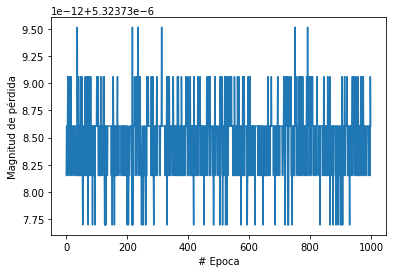

In [132]:

plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history['loss'])
